In [72]:
%pylab inline
import pandas as pd
import uproot
import awkward as ak
from yahist import Hist1D
from yahist.utils import plot_stack
import mplhep as hep
plt.style.use([hep.style.CMS, hep.style.firamath])

Populating the interactive namespace from numpy and matplotlib


In [73]:
t = uproot.open("../output/run2_all_with_isoTrack_isolation_no_HHggZZ.root")["t"]

In [74]:
df = t.arrays(library = "pd")

In [75]:
df.columns

Index(['MET_dil_dphi', 'phi_tautau_SVFit', 'eta_bdt_tautau_SVFit',
       'eta_tautau_SVFit', 'gg_tt_hel_vis', 'lep12_dR', 'pt_tautau_SVFit',
       'lep12_deta', 'eta_tautau_vis', 'm_tautau_vis', 'max_bTag',
       'dPhi_MET_tau1', 'isoTrack_isolation_charged', 'isoTrack_isolation_all',
       'tt_hel', 'lep2_id_vs_j', 'Category', 'lep2_charge', 'lep2_pdgID',
       'lep2_id_vs_m', 'lep2_mass', 'lep2_tightID', 'lep1_id_vs_j',
       'lep1_mass', 'lep1_eta_bdt', 'gg_dR', 'dPhi_tautau_SVFit',
       'pt_tautau_vis', 'lep2_eta_bdt', 'gg_phi', 'g2_pixVeto', 'lep1_id_vs_e',
       'g1_eta_bdt', 'weight', 'MET_gg_dphi', 'gg_dPhi', 'g2_ptmgg',
       'gg_tt_CS', 'lep2_phi', 'g1_phi', 'phi_tautau_vis', 'lep2_eta', 'g1_pt',
       'process_id', 'gg_tt_hel', 'gg_pt', 'year', 'lep1_pdgID', 'g2_phi',
       'g1_eta', 'lep2_id_vs_e', 'g2_pt', 'dR_ggtautau_SVFit', 'g2_eta',
       'g1_idmva', 'gg_ptmgg', 'eta_bdt_tautau_vis', 'g1_ptmgg', 'g2_eta_bdt',
       'mgg', 'm_tautau_SVFit', 'g2_idmva', 'g1

In [76]:
df.loc[df["process_id"] == 0, "Category"].unique()

array([8., 4., 7., 1., 6., 3., 5., 2.], dtype=float32)

In [77]:
process_ids = {}
process_ids["Data"] = 0

process_ids["HH_ggTauTau"] = -1
#process_ids["HH_ggZZ"] = -2
#process_ids["HH_ggZZ_4l"] = -5
#process_ids["HH_ggZZ_2l2q"] = -6
process_ids["HH_ggWW_dileptonic"] = -3
process_ids["HH_ggWW_semileptonic"] = -4

process_ids["DiPhoton"] = 3
process_ids["GJets"] = 8
process_ids["TTGG"] = 7
process_ids["TTGamma"] = 6
process_ids["TTbar"] = 5
process_ids["VH"] = 9
process_ids["WGamma"] = 4
process_ids["ZGamma"] = 2
process_ids["ttH"] = 10
process_ids["ggH"] = 11
process_ids["VBFH"] = 12

In [78]:
is_resonant = {}

is_resonant["Data"] = False
is_resonant["DiPhoton"] = False
is_resonant["GJets"] = False
is_resonant["HH_ggTauTau"] = True
is_resonant["HH_ggZZ"] = True
is_resonant["HH_ggWW_dileptonic"] = True
is_resonant["HH_ggWW_semileptonic"] = True
is_resonant["HH_ggZZ_4l"] = True
is_resonant["HH_ggZZ_2l2q"] = True
is_resonant["TTGG"] = False
is_resonant["TTGamma"] = False
is_resonant["TTbar"] = False
is_resonant["VH"] = True
is_resonant["WGamma"] = False
is_resonant["ZGamma"] = False
is_resonant["ttH"] = True
is_resonant["ggH"] = True
is_resonant["VBFH"] = True


In [79]:
colors = {}
colors["Data"] = "k"
colors["DiPhoton"] = "C0"
colors["GJets"] = "C1"
colors["HH_ggTauTau"] = "k"
colors["HH_ggZZ"] = "b"
colors["HH_ggWW"] = "g"
colors["TTbar"] = "C3"
colors["VH"] = "C4"
colors["WGamma"] = "C5"
colors["ZGamma"] = "C6"
colors["ttH"] = "C7"
colors["ggH"] = "C8"
colors["VBFH"] = "C2"

### Glorious plots of Glorious BDT distributions

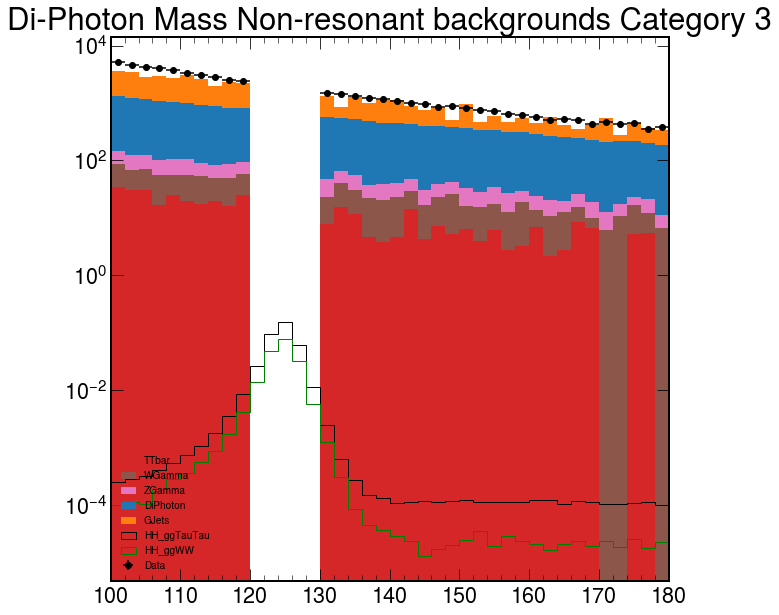

In [122]:
mgg_binning = "40,100,180" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process] and "HH_gg" not in process:
        continue
    toFill = df.loc[df["process_id"] == process_id, "mgg"] # select by process, then select the quantity
    weight = df.loc[df["process_id"] == process_id, "weight"]
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight)        

# plots
# stack non-signals
mgg_hists["TTbar"] += mgg_hists["TTGamma"] + mgg_hists["TTGG"]

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
mgg_hists["Data"].plot(show_errors=True, color="k")

# mgg_hists["HH_ggZZ"] += mgg_hists["HH_ggZZ"] + mgg_hists["HH_ggZZ_4l"] + mgg_hists["HH_ggZZ_2l2q"]
mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]
mgg_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step")
# mgg_hists["HH_ggZZ"].plot(histtype="step", color=colors["HH_ggZZ"])
mgg_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
plt.title("Di-Photon Mass Non-resonant backgrounds Category 3")
ax.set_yscale("log")
ax.legend(fontsize=10)

In [ ]:
mgg_binning = "40,100,180" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process]:
        continue
    toFill = df.loc[df["process_id"] == process_id, "mgg"] # select by process, then select the quantity
    weight = df.loc[df["process_id"] == process_id, "weight"]
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#mgg_hists["Data"].plot(show_errors=True, color="k")

mgg_hists["HH_ggZZ"] += mgg_hists["HH_ggZZ"] + mgg_hists["HH_ggZZ_4l"] + mgg_hists["HH_ggZZ_2l2q"]
mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]
mgg_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step")
mgg_hists["HH_ggZZ"].plot(histtype="step", color=colors["HH_ggZZ"])
mgg_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
plt.title("Di-Photon Mass Resonant backgrounds")
ax.set_yscale("log")
ax.legend(fontsize=10)

In [ ]:
g1_ptmgg_binning = "50,0,10" # ROOT convention

g1_ptmgg_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g1_ptmgg"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        if process in colors:
            g1_ptmgg_hists[process] = Hist1D(toFill.values, bins=g1_ptmgg_binning, label=process, weights=weight, color=colors[process])
        else:
            g1_ptmgg_hists[process] = Hist1D(toFill.values, bins=g1_ptmgg_binning, label=process, weights=weight)
            
g1_ptmgg_hists["TTbar"] += g1_ptmgg_hists["TTGamma"] + g1_ptmgg_hists["TTGG"]

# plots
# stack non-signals
hist_stack = [hist for process, hist in g1_ptmgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g1_ptmgg_hists["Data"].plot(show_errors=True, color="k")
g1_ptmgg_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading photon pt/mgg non-resonant backgrounds")

In [ ]:
g1_ptmgg_binning = "50,0,10" # ROOT convention

g1_ptmgg_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "g1_ptmgg"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g1_ptmgg_hists[process] = Hist1D(toFill.values, bins=g1_ptmgg_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g1_ptmgg_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
g1_ptmgg_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading photon pt/mgg resonant backgrounds")

In [ ]:
g2_ptmgg_binning = "30,0,6" # ROOT convention

g2_ptmgg_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g2_ptmgg"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g2_ptmgg_hists[process] = Hist1D(toFill.values, bins=g2_ptmgg_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
g2_ptmgg_hists["TTbar"] += g2_ptmgg_hists["TTGamma"] + g2_ptmgg_hists["TTGG"]

hist_stack = [hist for process, hist in g2_ptmgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g2_ptmgg_hists["Data"].plot(show_errors=True, color="k")
g2_ptmgg_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Sub-leading photon pt/mgg non-resonant backgrounds")

In [ ]:
g2_ptmgg_binning = "30,0,6" # ROOT convention

g2_ptmgg_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "g2_ptmgg"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g2_ptmgg_hists[process] = Hist1D(toFill.values, bins=g2_ptmgg_binning, label=process, weights=weight, color=colors[process] if process in colors else None)
        

# plots
# stack non-signals
hist_stack = [hist for process, hist in g2_ptmgg_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
g2_ptmgg_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Subleading photon pt/mgg resonant backgrounds")

In [ ]:
g1_pt_binning = "50,0,500" # ROOT convention

g1_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id),  "g1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id), "weight"]
        g1_pt_hists[process] = Hist1D(toFill.values, bins=g1_pt_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
g1_pt_hists["TTbar"] += g1_pt_hists["TTGG"] + g1_pt_hists["TTGamma"]
# stack non-signals
hist_stack = [hist for process, hist in g1_pt_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g1_pt_hists["Data"].plot(show_errors=True, color="k")
g1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading photon pt non-resonant backgrounds")

In [ ]:
g1_pt_binning = "50,0,500" # ROOT convention

g1_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) , "g1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) , "weight"]
        g1_pt_hists[process] = Hist1D(toFill.values, bins=g1_pt_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g1_pt_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ead_pho_pt_hists["Data"].plot(show_errors=True, color="k")
g1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading photon pt Resonant backgrounds")

In [ ]:
g2_pt_binning = "50,0,500" # ROOT convention

g2_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g2_pt"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g2_pt_hists[process] = Hist1D(toFill.values, bins=g2_pt_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
g2_pt_hists["TTbar"] += g2_pt_hists["TTGG"] + g2_pt_hists["TTGamma"]
hist_stack = [hist for process, hist in g2_pt_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g2_pt_hists["Data"].plot(show_errors=True, color="k")
g2_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Subleading photon pt non-resonant backgrounds")

In [ ]:
g2_pt_binning = "50,0,500" # ROOT convention

g2_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "g2_pt"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g2_pt_hists[process] = Hist1D(toFill.values, bins=g2_pt_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g2_pt_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g2_pt_hists["Data"].plot(show_errors=True, color="k")
g2_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Subleading photon pt Resonant backgrounds")

In [ ]:
g1_eta_binning = "100,-2.5,2.5" # ROOT convention

g1_eta_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g1_eta"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g1_eta_hists[process] = Hist1D(toFill.values, bins=g1_eta_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
g1_eta_hists["TTbar"] += g1_eta_hists["TTGamma"] + g1_eta_hists["TTGG"]
hist_stack = [hist for process, hist in g1_eta_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g1_eta_hists["Data"].plot(show_errors=True, color="k")
g1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Photon $\eta$ non-resonant backgrounds")

In [ ]:
g1_eta_binning = "100,-2.5,2.5" # ROOT convention

g1_eta_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "g1_eta"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g1_eta_hists[process] = Hist1D(toFill.values, bins=g1_eta_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
#g1_eta_hists["TTBar"] += g1_eta_hists["TTGamma"] + g1_eta["TTGG"]
hist_stack = [hist for process, hist in g1_eta_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g1_eta_hists["Data"].plot(show_errors=True, color="k")
g1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Photon $\eta$ resonant backgrounds")

In [ ]:
g1_phi_binning = "100,-3.15,3.15" # ROOT convention

g1_phi_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g1_phi"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g1_phi_hists[process] = Hist1D(toFill.values, bins=g1_phi_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
g1_phi_hists["TTbar"] += g1_phi_hists["TTGG"] + g1_phi_hists["TTGamma"]
hist_stack = [hist for process, hist in g1_phi_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g1_phi_hists["Data"].plot(show_errors=True, color="k")
g1_phi_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Photon phi non-resonant backgrounds")

In [ ]:
g2_phi_binning = "100,-3.15,3.15" # ROOT convention

g2_phi_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g2_phi"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g2_phi_hists[process] = Hist1D(toFill.values, bins=g2_phi_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
g2_phi_hists["TTbar"] += g2_phi_hists["TTGG"] + g2_phi_hists["TTGamma"]
hist_stack = [hist for process, hist in g2_phi_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g2_phi_hists["Data"].plot(show_errors=True, color="k")
g2_phi_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("subleading Photon phi non-resonant backgrounds")

In [ ]:
n_bjets_binning = "10,0,10" # ROOT convention

n_bjets_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "n_bjets"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        n_bjets_hists[process] = Hist1D(toFill.values, bins=n_bjets_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
n_bjets_hists["TTbar"] += n_bjets_hists["TTGamma"] + n_bjets_hists["TTGG"]
hist_stack = [hist for process, hist in n_bjets_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#n_bjets_hists["Data"].plot(show_errors=True, color="k")
n_bjets_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("B-jet multiplicity non-resonant backgrounds")

Text(0.5, 1.0, 'MET pt non-resonant backgrounds')

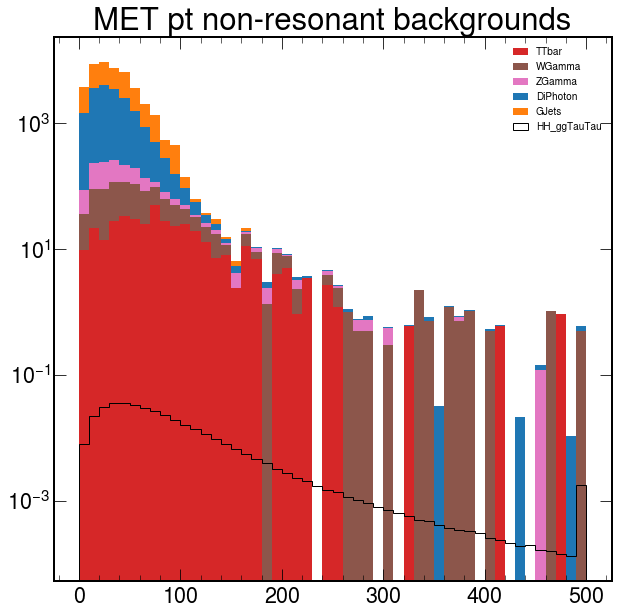

In [81]:
MET_pt_binning = "50,0,500" # ROOT convention

MET_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "MET_pt"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        MET_pt_hists[process] = Hist1D(toFill.values, bins=MET_pt_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
MET_pt_hists["TTbar"] += (MET_pt_hists["TTGG"] + MET_pt_hists["TTGamma"])
# stack non-signals
hist_stack = [hist for process, hist in MET_pt_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#MET_pt_hists["Data"].plot(show_errors=True, color="k")
MET_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("MET pt non-resonant backgrounds")

Text(0.5, 1.0, 'MET pt Resonant backgrounds')

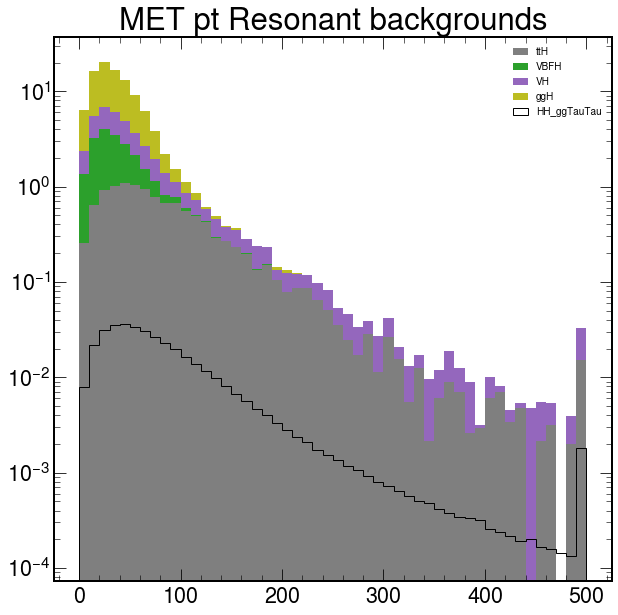

In [82]:
MET_pt_binning = "50,0,500" # ROOT convention

MET_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "MET_pt"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        MET_pt_hists[process] = Hist1D(toFill.values, bins=MET_pt_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in MET_pt_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#MET_pt_hists["Data"].plot(show_errors=True, color="k")
MET_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("MET pt Resonant backgrounds")

Text(0.5, 1.0, 'MET $\\phi$ non-resonant backgrounds')

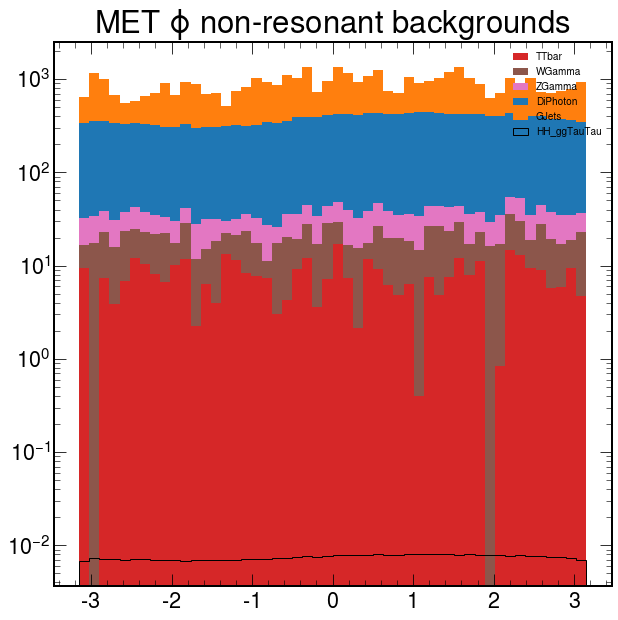

In [83]:
MET_phi_binning = "50,-3.15,3.15" # ROOT convention

MET_phi_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "MET_phi"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        MET_phi_hists[process] = Hist1D(toFill.values, bins=MET_phi_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
MET_phi_hists["TTbar"] += (MET_phi_hists["TTGamma"] + MET_phi_hists["TTGG"])
hist_stack = [hist for process, hist in MET_phi_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#MET_phi_hists["Data"].plot(show_errors=True, color="k")
MET_phi_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("MET $\phi$ non-resonant backgrounds")

Text(0.5, 1.0, 'MET $\\phi$ resonant backgrounds')

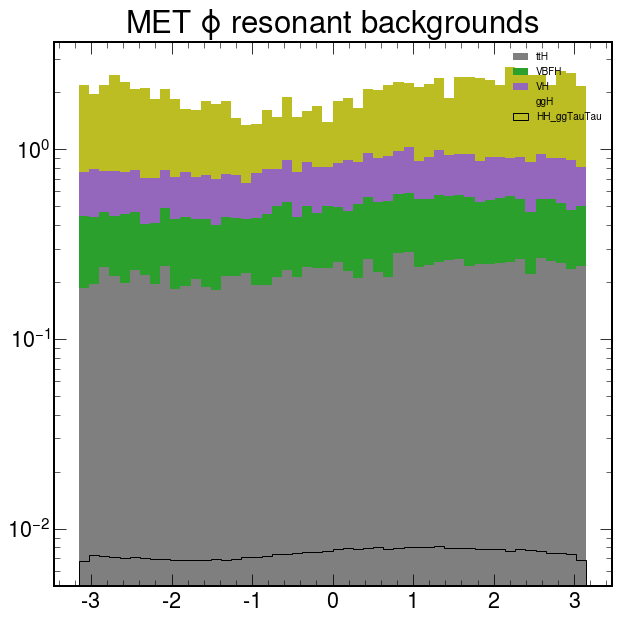

In [84]:
MET_phi_binning = "50,-3.15,3.15" # ROOT convention

MET_phi_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "MET_phi"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        MET_phi_hists[process] = Hist1D(toFill.values, bins=MET_phi_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in MET_phi_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#MET_phi_hists["Data"].plot(show_errors=True, color="k")
MET_phi_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("MET $\phi$ resonant backgrounds")

Text(0.5, 1.0, 'DiPhoton $\\Delta$R resonant backgrounds')

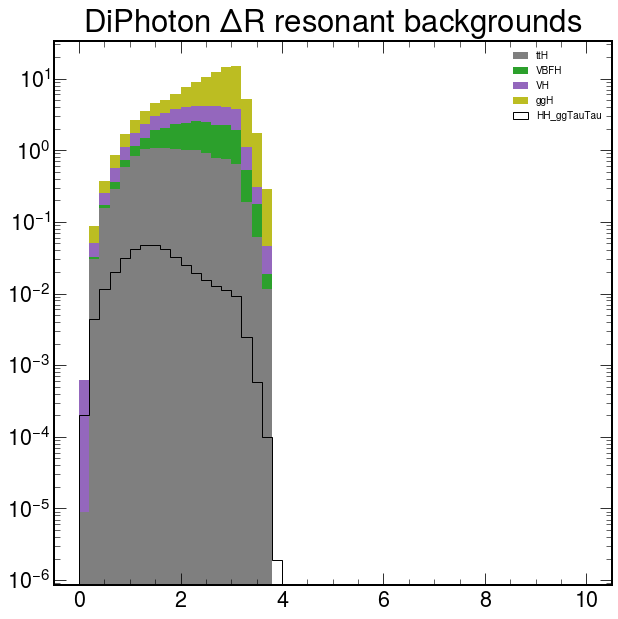

In [85]:
gg_dR_binning = "50,0,10" # ROOT convention

gg_dR_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "gg_dR"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        gg_dR_hists[process] = Hist1D(toFill.values, bins=gg_dR_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in gg_dR_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#gg_dR_hists["Data"].plot(show_errors=True, color="k")
gg_dR_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("DiPhoton $\Delta$R resonant backgrounds")

Text(0.5, 1.0, 'DiPhoton $\\Delta$R non-resonant backgrounds')

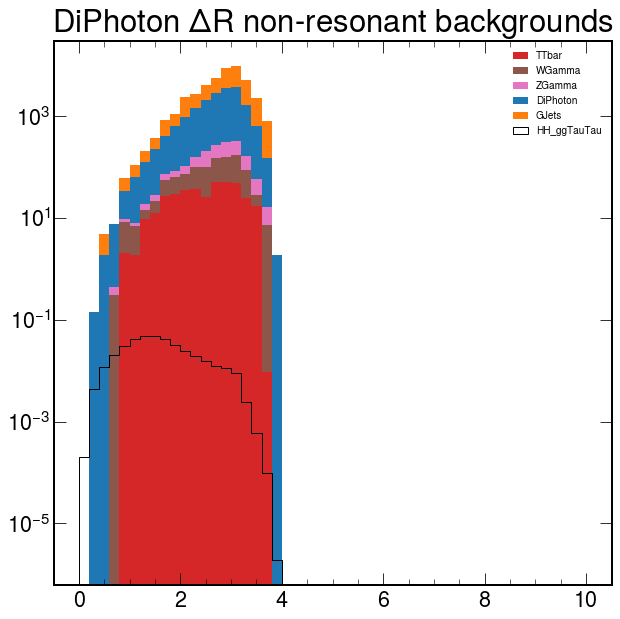

In [86]:
gg_dR_binning = "50,0,10" # ROOT convention

gg_dR_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "gg_dR"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        gg_dR_hists[process] = Hist1D(toFill.values, bins=gg_dR_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
gg_dR_hists["TTbar"] += gg_dR_hists["TTGamma"] + gg_dR_hists["TTGG"]
hist_stack = [hist for process, hist in gg_dR_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#gg_dR_hists["Data"].plot(show_errors=True, color="k")
gg_dR_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("DiPhoton $\Delta$R non-resonant backgrounds")

## Lepton distributions

Text(0.5, 1.0, 'Leading Electron pt - non resonant backgrounds')

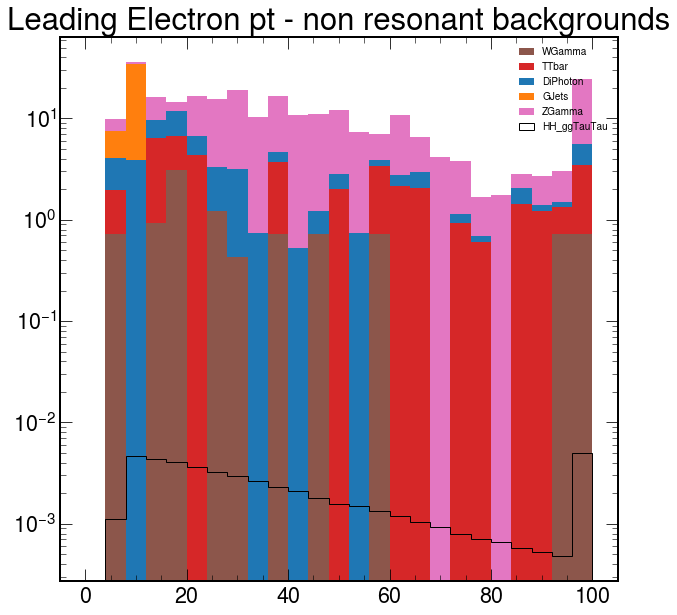

In [87]:
ele1_pt_binning = "25,0,100" # ROOT convention # Only electrons!

ele1_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 11), "lep1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 11), "weight"]
        ele1_pt_hists[process] = Hist1D(toFill.values, bins=ele1_pt_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
ele1_pt_hists["TTbar"] += ele1_pt_hists["TTGamma"] + ele1_pt_hists["TTGG"]
# stack non-signals
hist_stack = [hist for process, hist in ele1_pt_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele1_pt_hists["Data"].plot(show_errors=True, color="k")
ele1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Electron pt - non resonant backgrounds")

Text(0.5, 1.0, 'Leading Electron $\\eta$  - non resonant backgrounds')

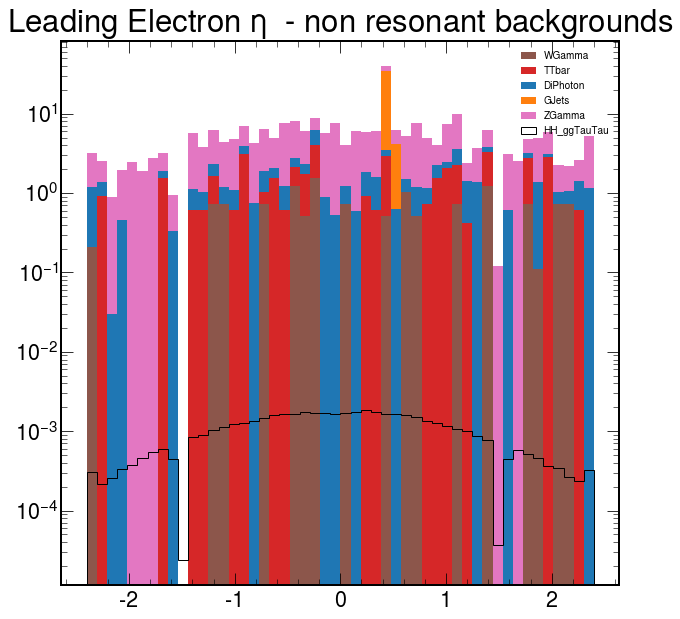

In [88]:
ele1_eta_binning = "50,-2.4,2.4" # ROOT convention # Only electrons!

ele1_eta_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 11), "lep1_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 11), "weight"]
        ele1_eta_hists[process] = Hist1D(toFill.values, bins=ele1_eta_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
ele1_eta_hists["TTbar"] += ele1_eta_hists["TTGamma"] + ele1_eta_hists["TTGG"]
hist_stack = [hist for process, hist in ele1_eta_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele1_eta_hists["Data"].plot(show_errors=True, color="k")
ele1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Electron $\eta$  - non resonant backgrounds")

Text(0.5, 1.0, 'Leading Electron pt - resonant backgrounds')

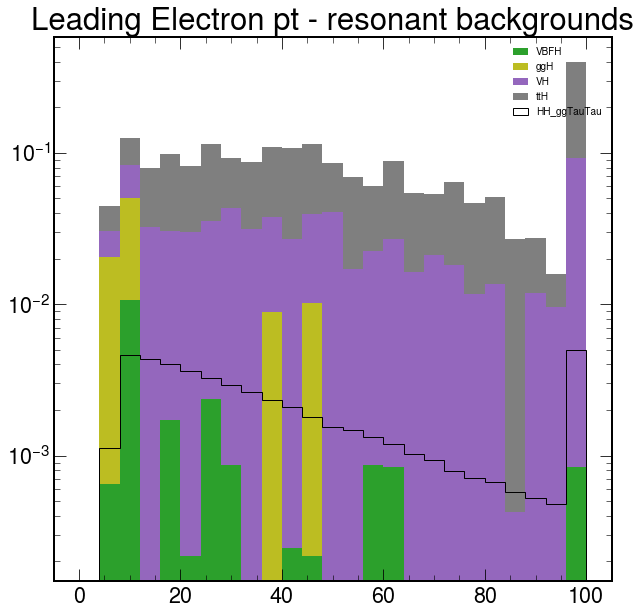

In [89]:
ele1_pt_binning = "25,0,100" # ROOT convention # Only electrons!

ele1_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 11), "lep1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 11), "weight"]
        ele1_pt_hists[process] = Hist1D(toFill.values, bins=ele1_pt_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in ele1_pt_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele1_pt_hists["Data"].plot(show_errors=True, color="k")
ele1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Electron pt - resonant backgrounds")

Text(0.5, 1.0, 'Leading Electron $\\eta$ - resonant backgrounds')

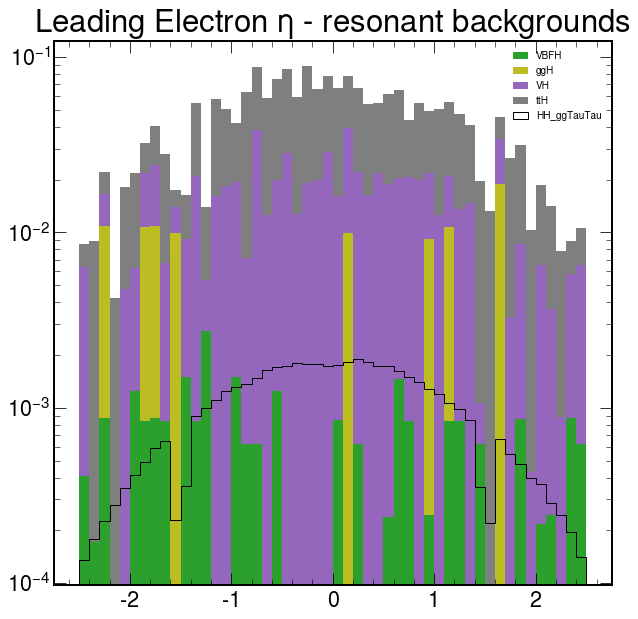

In [90]:
ele1_eta_binning = "50,-2.5,2.5" # ROOT convention # Only electrons!

ele1_eta_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 11), "lep1_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 11), "weight"]
        ele1_eta_hists[process] = Hist1D(toFill.values, bins=ele1_eta_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in ele1_eta_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele1_eta_hists["Data"].plot(show_errors=True, color="k")
ele1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Electron $\eta$ - resonant backgrounds")

Text(0.5, 1.0, 'Trailing Electron pt - non resonant backgrounds')

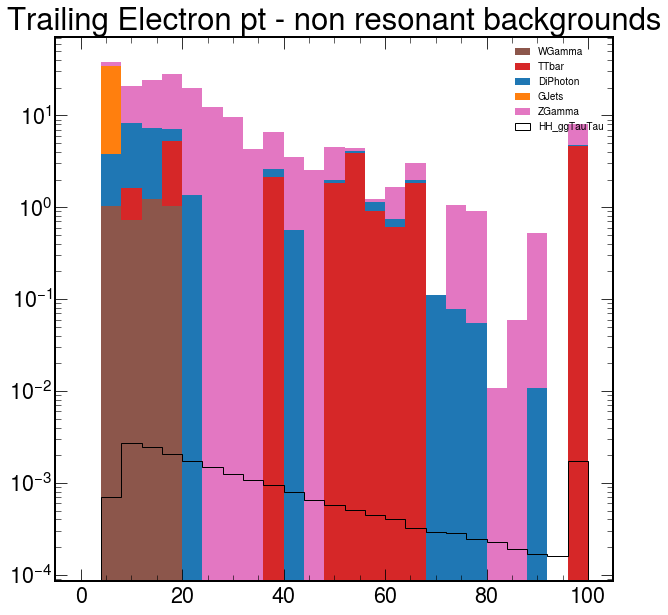

In [91]:
ele2_pt_binning = "25,0,100" # ROOT convention # Only electrons!

ele2_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgID"]) == 11), "lep2_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgID"]) == 11), "weight"]
        ele2_pt_hists[process] = Hist1D(toFill.values, bins=ele2_pt_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
ele2_pt_hists["TTbar"] += ele2_pt_hists["TTGamma"] + ele2_pt_hists["TTGG"]
hist_stack = [hist for process, hist in ele2_pt_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele2_pt_hists["Data"].plot(show_errors=True, color="k")
ele2_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Electron pt - non resonant backgrounds")

Text(0.5, 1.0, 'Trailing Electron $\\eta$ - non resonant backgrounds')

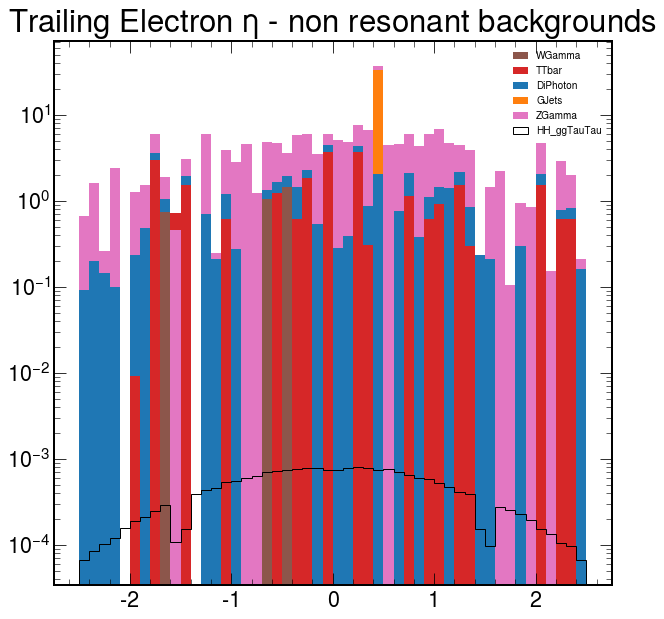

In [92]:
ele2_eta_binning = "50,-2.5,2.5" # ROOT convention # Only electrons!

ele2_eta_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgID"]) == 11), "lep2_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgID"]) == 11), "weight"]
        ele2_eta_hists[process] = Hist1D(toFill.values, bins=ele2_eta_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
ele2_eta_hists["TTbar"] += ele2_eta_hists["TTGamma"] + ele2_eta_hists["TTGG"]
hist_stack = [hist for process, hist in ele2_eta_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele2_eta_hists["Data"].plot(show_errors=True, color="k")
ele2_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Electron $\eta$ - non resonant backgrounds")

Text(0.5, 1.0, 'Trailing Electron pt - resonant backgrounds')

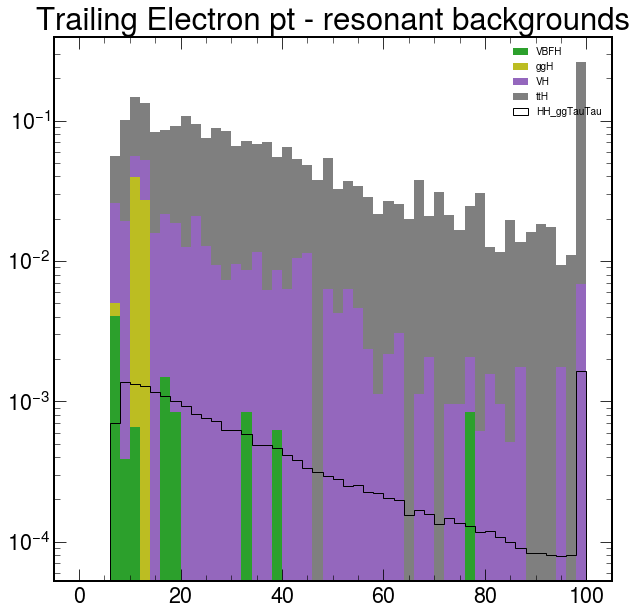

In [93]:
ele2_pt_binning = "50,0,100" # ROOT convention # Only electrons!

ele2_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgID"]) == 11), "lep2_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgID"]) == 11), "weight"]
        ele2_pt_hists[process] = Hist1D(toFill.values, bins=ele2_pt_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in ele2_pt_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele2_pt_hists["Data"].plot(show_errors=True, color="k")
ele2_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Electron pt - resonant backgrounds")

Text(0.5, 1.0, 'Trailing Electron $\\eta$ - resonant backgrounds')

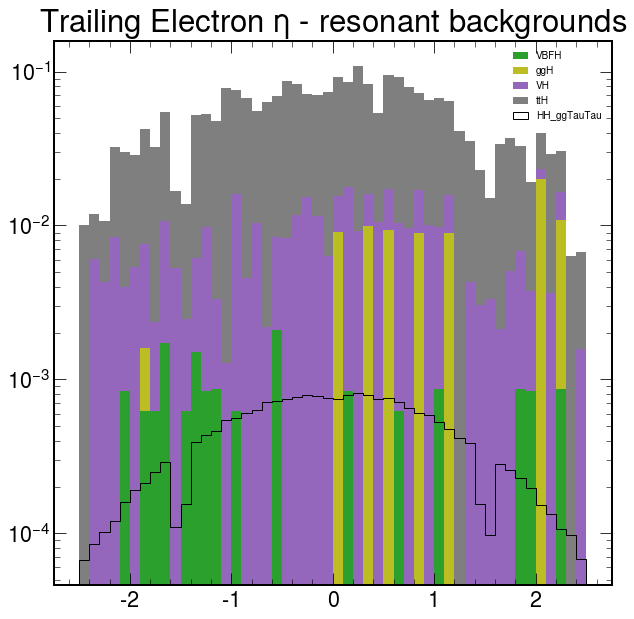

In [94]:
ele2_eta_binning = "50,-2.5,2.5" # ROOT convention # Only electrons!

ele2_eta_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgID"]) == 11), "lep2_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgID"]) == 11), "weight"]
        ele2_eta_hists[process] = Hist1D(toFill.values, bins=ele2_eta_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in ele2_eta_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele2_eta_hists["Data"].plot(show_errors=True, color="k")
ele2_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Electron $\eta$ - resonant backgrounds")

Text(0.5, 1.0, 'Leading Muon pt  - non resonant backgrounds')

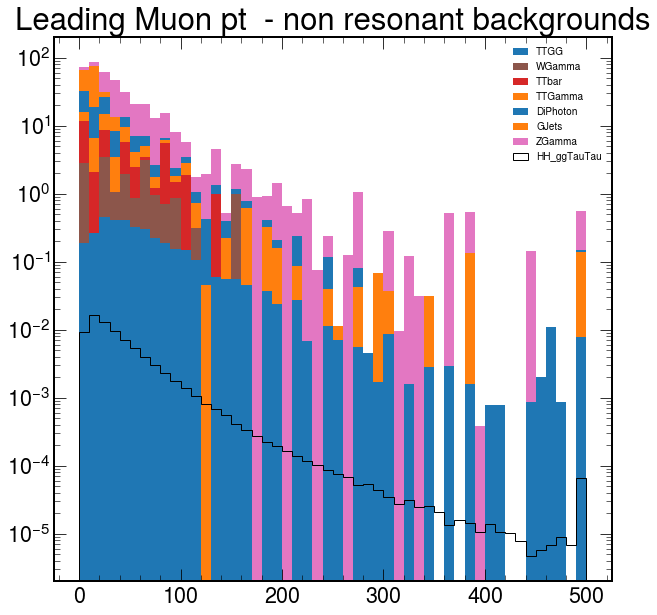

In [95]:
mu1_pt_binning = "50,0,500" # ROOT convention # Only muons

mu1_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 13), "lep1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 13), "weight"]
        mu1_pt_hists[process] = Hist1D(toFill.values, bins=mu1_pt_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
mu1_pt_hists["TTbar"] += mu1_pt_hists["TTGamma"] + mu1_pt_hists["TTGG"]
hist_stack = [hist for process, hist in mu1_pt_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#mu1_pt_hists["Data"].plot(show_errors=True, color="k")
mu1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Muon pt  - non resonant backgrounds")

Text(0.5, 1.0, 'Leading Muon eta (mumu, mu-e and mu-tau) - non resonant backgrounds')

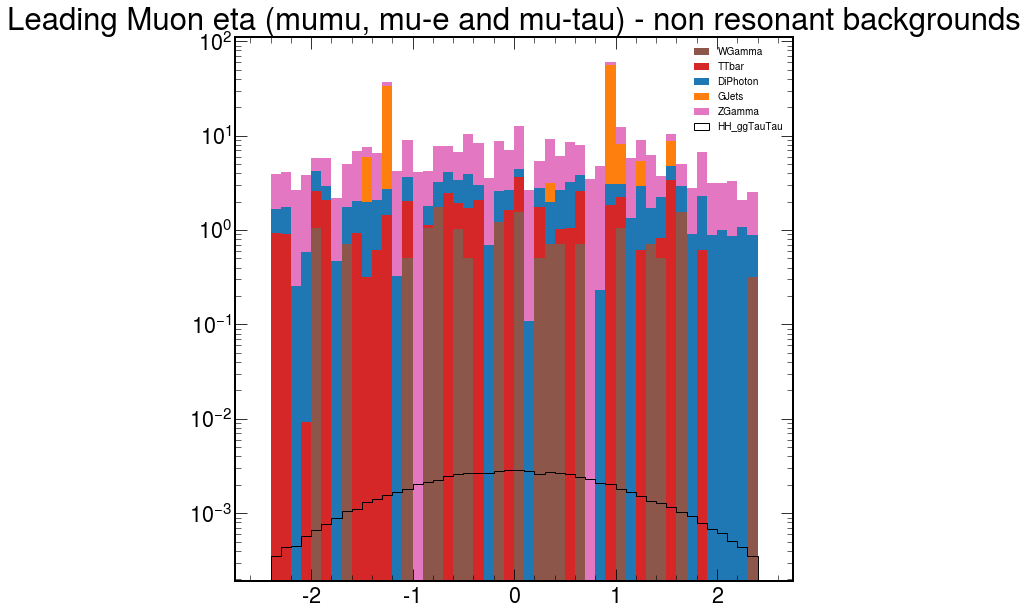

In [96]:
mu1_eta_binning = "50,-2.5,2.5" # ROOT convention # Only muons

mu1_eta_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 13), "lep1_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 13), "weight"]
        mu1_eta_hists[process] = Hist1D(toFill.values, bins=mu1_eta_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
mu1_eta_hists["TTbar"] += mu1_eta_hists["TTGamma"] + mu1_eta_hists["TTGG"]
hist_stack = [hist for process, hist in mu1_eta_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#mu1_eta_hists["Data"].plot(show_errors=True, color="k")
mu1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Muon eta (mumu, mu-e and mu-tau) - non resonant backgrounds")

Text(0.5, 1.0, 'Leading Muon pt - resonant backgrounds')

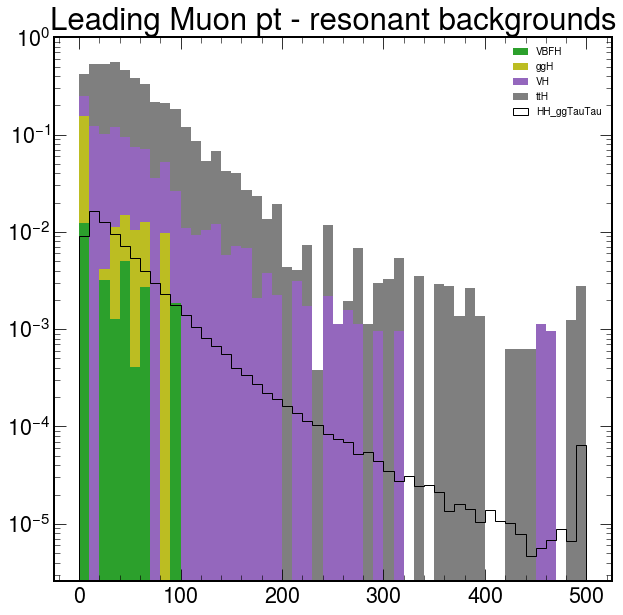

In [97]:
mu1_pt_binning = "50,0,500" # ROOT convention # Only muons

mu1_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 13), "lep1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 13), "weight"]
        mu1_pt_hists[process] = Hist1D(toFill.values, bins=mu1_pt_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in mu1_pt_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#mu1_pt_hists["Data"].plot(show_errors=True, color="k")
mu1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Muon pt - resonant backgrounds")

Text(0.5, 1.0, 'Leading Muon eta (mumu, mu-e and mu-tau) - resonant backgrounds')

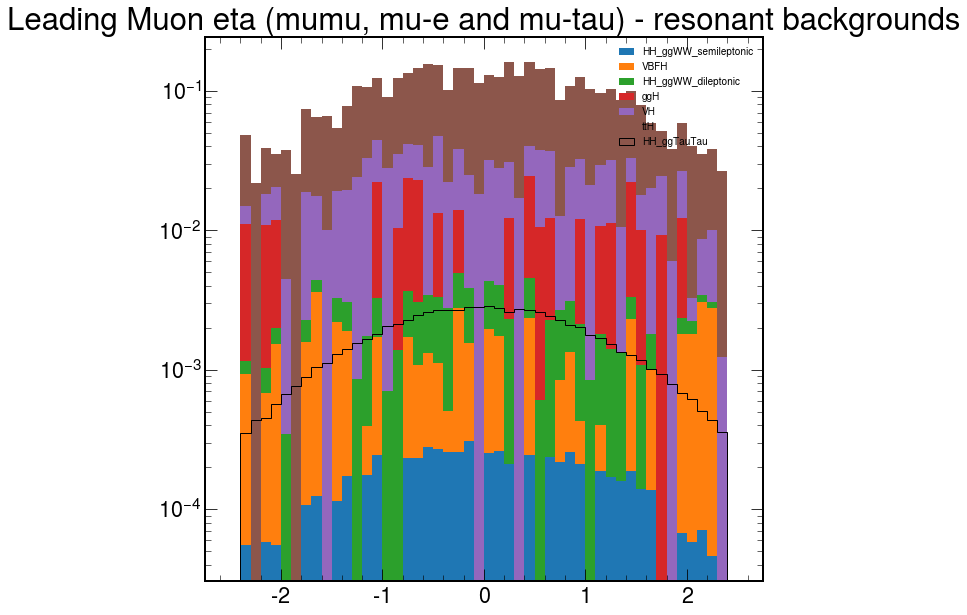

In [99]:
mu1_eta_binning = "50,-2.5,2.5" # ROOT convention # Only muons

mu1_eta_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 13), "lep1_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 13), "weight"]
        mu1_eta_hists[process] = Hist1D(toFill.values, bins=mu1_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in mu1_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#mu1_eta_hists["Data"].plot(show_errors=True, color="k")
mu1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Muon eta (mumu, mu-e and mu-tau) - resonant backgrounds")

Text(0.5, 1.0, 'Leading Tau pt (tau-tau, tau-iso) - non resonant backgrounds')

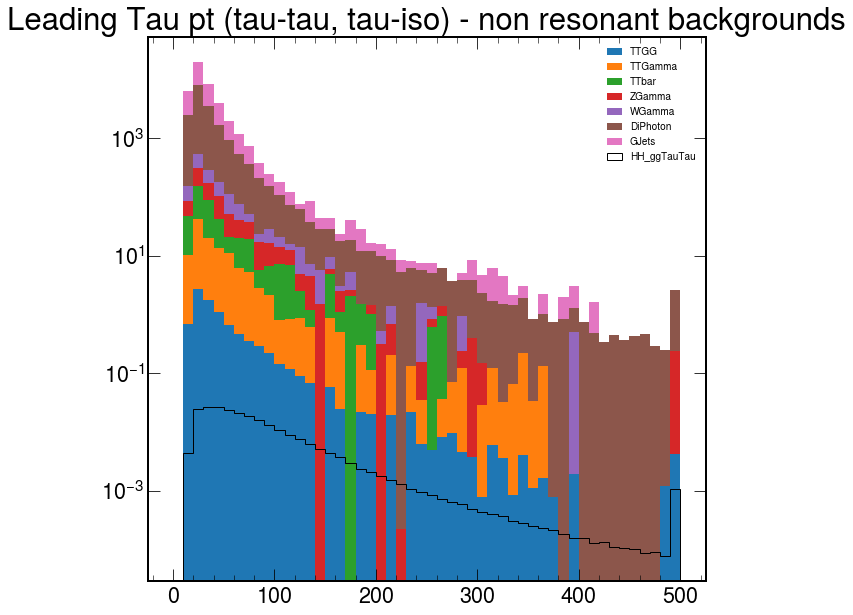

In [101]:
tau1_pt_binning = "50,0,500" # ROOT convention # Only muons

tau1_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 15), "lep1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 15), "weight"]
        tau1_pt_hists[process] = Hist1D(toFill.values, bins=tau1_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau1_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#tau1_pt_hists["Data"].plot(show_errors=True, color="k")
tau1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Tau pt (tau-tau, tau-iso) - non resonant backgrounds")

Text(0.5, 1.0, 'Leading Tau eta (tau-tau, tau-iso) - non resonant backgrounds')

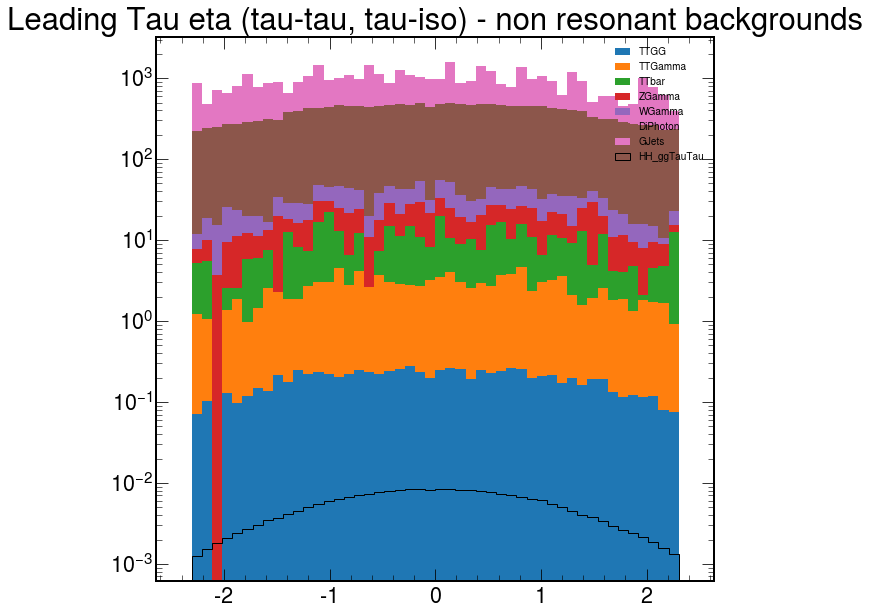

In [102]:
tau1_eta_binning = "50,-2.4,2.4" # ROOT convention # Only muons

tau1_eta_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 15), "lep1_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 15), "weight"]
        tau1_eta_hists[process] = Hist1D(toFill.values, bins=tau1_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau1_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and nofn-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#tau1_eta_hists["Data"].plot(show_errors=True, color="k")
tau1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Tau eta (tau-tau, tau-iso) - non resonant backgrounds")

Text(0.5, 1.0, 'Leading Tau pt (tau-tau, tau-iso) - resonant backgrounds')

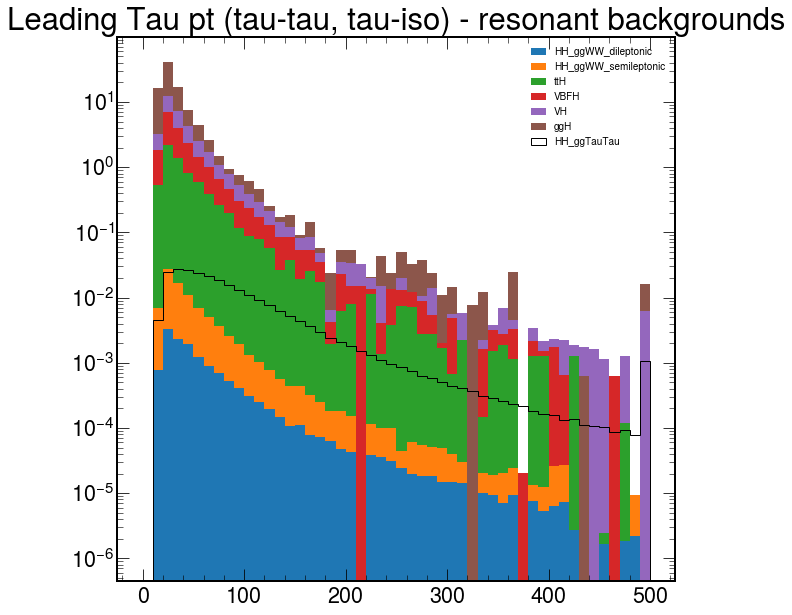

In [103]:
tau1_pt_binning = "50,0,500" # ROOT convention # Only muons

tau1_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 15), "lep1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 15), "weight"]
        tau1_pt_hists[process] = Hist1D(toFill.values, bins=tau1_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau1_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#tau1_pt_hists["Data"].plot(show_errors=True, color="k")
tau1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Tau pt (tau-tau, tau-iso) - resonant backgrounds")

Text(0.5, 1.0, 'Leading Tau eta (tau-tau, tau-iso) - resonant backgrounds')

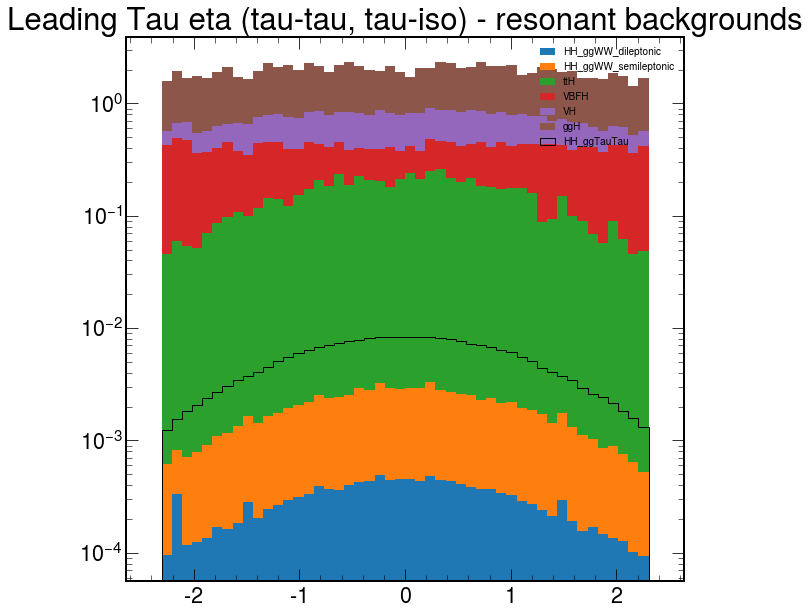

In [104]:
tau1_eta_binning = "50,-2.4,2.4" # ROOT convention # Only muons

tau1_eta_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 15), "lep1_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgID"]) == 15), "weight"]
        tau1_eta_hists[process] = Hist1D(toFill.values, bins=tau1_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau1_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and nofn-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#tau1_eta_hists["Data"].plot(show_errors=True, color="k")
tau1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Tau eta (tau-tau, tau-iso) - resonant backgrounds")

Text(0.5, 1.0, 'Trailing Tau pt (e-tau, mu-tau, tau-tau) - non resonant backgrounds')

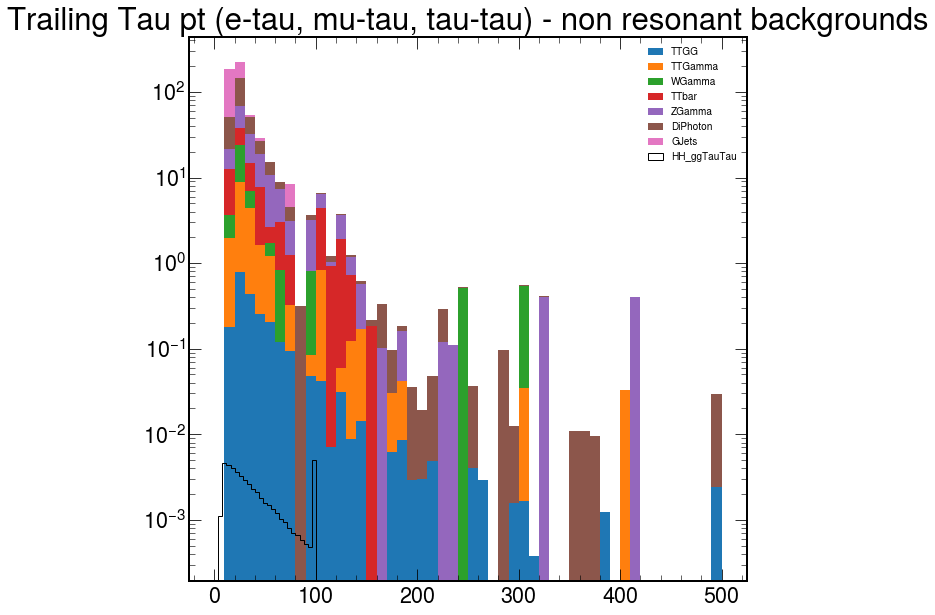

In [105]:
tau2_pt_binning = "50,0,500" # ROOT convention # Only muons

tau2_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgID"]) == 15), "lep2_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgID"]) == 15), "weight"]
        tau2_pt_hists[process] = Hist1D(toFill.values, bins=tau2_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau2_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele1_pt_hists["Data"].plot(show_errors=True, color="k")
ele1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Tau pt (e-tau, mu-tau, tau-tau) - non resonant backgrounds")

In [ ]:
tau2_eta_binning = "50,-2.4,2.4" # ROOT convention # Only muons

tau2_eta_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "lep2_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "weight"]
        tau2_eta_hists[process] = Hist1D(toFill.values, bins=tau2_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau2_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#tau2_eta_hists["Data"].plot(show_errors=True, color="k")
tau2_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Tau eta (e-tau, mu-tau, tau-tau) - non resonant backgrounds")

In [ ]:
tau2_pt_binning = "50,0,500" # ROOT convention # Only muons

tau2_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "lep2_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "weight"]
        tau2_pt_hists[process] = Hist1D(toFill.values, bins=tau2_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau2_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele1_pt_hists["Data"].plot(show_errors=True, color="k")
ele1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Tau pt (e-tau, mu-tau, tau-tau) - resonant backgrounds")

In [ ]:
tau2_eta_binning = "50,-2.4,2.4" # ROOT convention # Only muons

tau2_eta_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "lep2_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "weight"]
        tau2_eta_hists[process] = Hist1D(toFill.values, bins=tau2_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau2_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#tau2_eta_hists["Data"].plot(show_errors=True, color="k")
tau2_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Tau eta (e-tau, mu-tau, tau-tau) - resonant backgrounds")

Text(0.5, 1.0, '$\\Delta\\phi(MET,\\tau_1$) - resonant backgrounds')

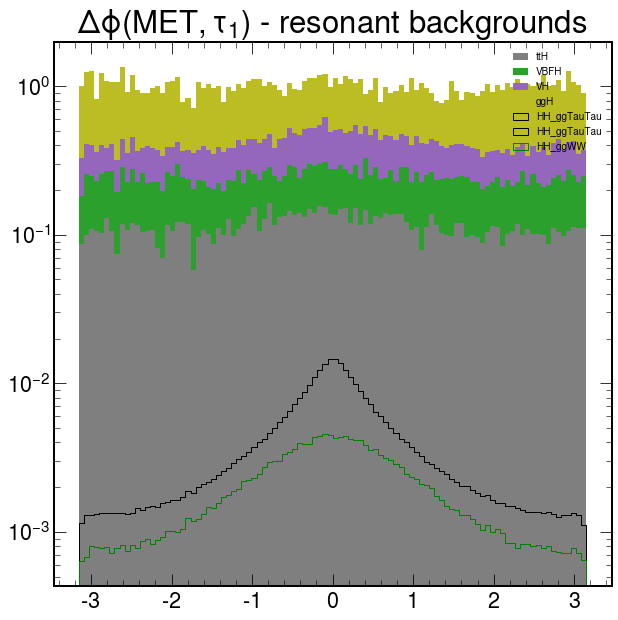

In [108]:
dPhi_MET_tau1_binning="100,-3.15,3.15"

dPhi_MET_tau1_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id), "dPhi_MET_tau1"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id), "weight"]
        dPhi_MET_tau1_hists[process] = Hist1D(toFill.values, bins=dPhi_MET_tau1_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in dPhi_MET_tau1_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#dPhi_MET_tau1_hists["Data"].plot(show_errors=True, color="k")
dPhi_MET_tau1_hists["HH_ggTauTau"].plot(color="k", histtype="step")
# dPhi_MET_tau1_hists["HH_ggZZ"] += dPhi_MET_tau1_hists["HH_ggZZ"] + dPhi_MET_tau1_hists["HH_ggZZ_4l"] + dPhi_MET_tau1_hists["HH_ggZZ_2l2q"]
dPhi_MET_tau1_hists["HH_ggWW"] = dPhi_MET_tau1_hists["HH_ggWW_dileptonic"] + dPhi_MET_tau1_hists["HH_ggWW_semileptonic"]
dPhi_MET_tau1_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step")
# dPhi_MET_tau1_hists["HH_ggZZ"].plot(histtype="step", color=colors["HH_ggZZ"])
dPhi_MET_tau1_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("$\Delta\phi(MET,\\tau_1$) - resonant backgrounds")


In [109]:
dPhi_MET_tau2_binning="100,-3.15,3.15"

dPhi_MET_tau2_hists = {}
for process, process_id in process_ids.items():
        if is_resonant[process] and "HH_gg" not in process:
            continue
        toFill = df.loc[(df["process_id"] == process_id), "dPhi_MET_tau2"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id), "weight"]
        dPhi_MET_tau2_hists[process] = Hist1D(toFill.values, bins=dPhi_MET_tau2_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals

dPhi_MET_tau2_hists["TTbar"] += dPhi_MET_tau2_hists["TTGamma"] + dPhi_MET_tau2_hists["TTGG"]

hist_stack = [hist for process, hist in dPhi_MET_tau2_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#dPhi_MET_tau2_hists["Data"].plot(show_errors=True, color="k")
dPhi_MET_tau2_hists["HH_ggTauTau"].plot(color="k", histtype="step")
# dPhi_MET_tau2_hists["HH_ggZZ"] += dPhi_MET_tau2_hists["HH_ggZZ"] + dPhi_MET_tau2_hists["HH_ggZZ_4l"] + dPhi_MET_tau2_hists["HH_ggZZ_2l2q"]
dPhi_MET_tau2_hists["HH_ggWW"] = dPhi_MET_tau2_hists["HH_ggWW_dileptonic"] + dPhi_MET_tau2_hists["HH_ggWW_semileptonic"]
dPhi_MET_tau2_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step")
# dPhi_MET_tau2_hists["HH_ggZZ"].plot(histtype="step", color=colors["HH_ggZZ"])
dPhi_MET_tau2_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("$\Delta\phi(MET,\\tau_1$) - Non-resonant backgrounds")


KeyError: 'dPhi_MET_tau2'

In [110]:
def phi_mpi_pi(x):
    while x >= np.pi:
        x -= 2. * np.pi
    while x < -np.pi:
        x += 2. * np.pi
    return x

In [111]:
df["dPhi_MET_tau2"] = np.ones(len(df)) * -999

df.loc[(df["Category"] < 8) & (df["lep1_pt"] > df["lep2_pt"]), "dPhi_MET_tau2"] = df.loc[df["lep1_pt"] > df["lep2_pt"], "MET_phi"] - df.loc[df["lep1_pt"] > df["lep2_pt"], "lep2_phi"]
df.loc[(df["Category"] < 8) & (df["lep1_pt"] <= df["lep2_pt"]), "dPhi_MET_tau2"] = df.loc[df["lep1_pt"] <= df["lep2_pt"], "MET_phi"] - df.loc[df["lep1_pt"] <= df["lep2_pt"], "lep1_phi"]

df.loc[df["Category"] < 8, "dPhi_MET_tau2"] = df.loc[df["Category"] < 8, "dPhi_MET_tau2"].apply(phi_mpi_pi)

Text(0.5, 1.0, '$\\Delta\\phi(MET,\\tau_2$) - resonant backgrounds')

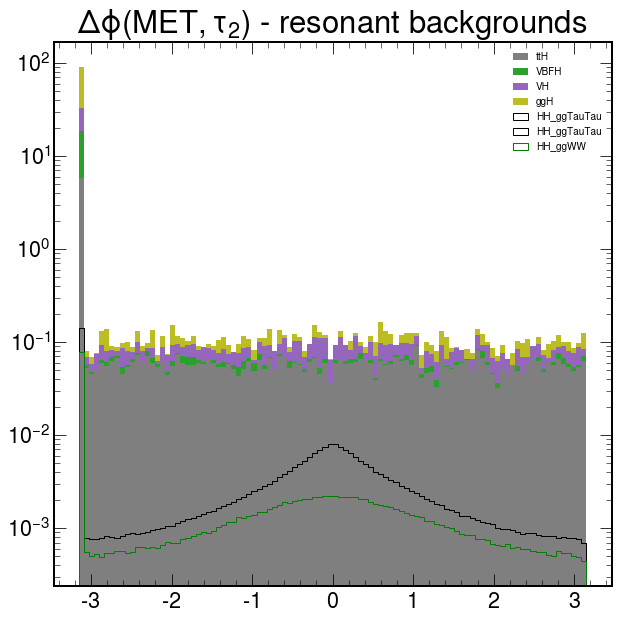

In [113]:
dPhi_MET_tau2_binning="100,-3.15,3.15"

dPhi_MET_tau2_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id), "dPhi_MET_tau2"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id), "weight"]
        dPhi_MET_tau2_hists[process] = Hist1D(toFill.values, bins=dPhi_MET_tau2_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals
hist_stack = [hist for process, hist in dPhi_MET_tau2_hists.items() if "HH_gg" not in process and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#dPhi_MET_tau2_hists["Data"].plot(show_errors=True, color="k")
dPhi_MET_tau2_hists["HH_ggTauTau"].plot(color="k", histtype="step")
# dPhi_MET_tau2_hists["HH_ggZZ"] += dPhi_MET_tau2_hists["HH_ggZZ"] + dPhi_MET_tau2_hists["HH_ggZZ_4l"] + dPhi_MET_tau2_hists["HH_ggZZ_2l2q"]
dPhi_MET_tau2_hists["HH_ggWW"] = dPhi_MET_tau2_hists["HH_ggWW_dileptonic"] + dPhi_MET_tau2_hists["HH_ggWW_semileptonic"]
dPhi_MET_tau2_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step")
# dPhi_MET_tau2_hists["HH_ggZZ"].plot(histtype="step", color=colors["HH_ggZZ"])
dPhi_MET_tau2_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("$\Delta\phi(MET,\\tau_2$) - resonant backgrounds")


In [ ]:
### dPhi_MET_tau2_binning="100,-3.15,3.15"

dPhi_MET_tau2_hists = {}
for process, process_id in process_ids.items():
        if is_resonant[process] and "HH_gg" not in process:
            continue
        toFill = df.loc[(df["process_id"] == process_id), "dPhi_MET_tau2"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id), "weight"]
        dPhi_MET_tau2_hists[process] = Hist1D(toFill.values, bins=dPhi_MET_tau2_binning, label=process, weights=weight, color=colors[process] if process in colors else None)

# plots
# stack non-signals

dPhi_MET_tau2_hists["TTbar"] += dPhi_MET_tau2_hists["TTGamma"] + dPhi_MET_tau2_hists["TTGG"]

hist_stack = [hist for process, hist in dPhi_MET_tau2_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#dPhi_MET_tau2_hists["Data"].plot(show_errors=True, color="k")
dPhi_MET_tau2_hists["HH_ggTauTau"].plot(color="k", histtype="step")
dPhi_MET_tau2_hists["HH_ggZZ"] += dPhi_MET_tau2_hists["HH_ggZZ"] + dPhi_MET_tau2_hists["HH_ggZZ_4l"] + dPhi_MET_tau2_hists["HH_ggZZ_2l2q"]
dPhi_MET_tau2_hists["HH_ggWW"] = dPhi_MET_tau2_hists["HH_ggWW_dileptonic"] + dPhi_MET_tau2_hists["HH_ggWW_semileptonic"]
dPhi_MET_tau2_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step")
dPhi_MET_tau2_hists["HH_ggZZ"].plot(histtype="step", color=colors["HH_ggZZ"])
dPhi_MET_tau2_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("$\Delta\phi(MET,\\tau_2$) - Non-resonant backgrounds")

In [ ]:
with uproot.recreate("../output/run2_yields_new.root") as f:
    f["t"] = df

In [ ]:
### from yahist import Hist2D
Hist2D(df.loc[(df["process_id"] == -1) & (df["Category"] < 8), ["dPhi_MET_tau1", "dPhi_MET_tau2"]], weights=df.loc[(df["process_id"] == -1) & (df["Category"] < 8), "weight"]).plot()

## For slides

'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


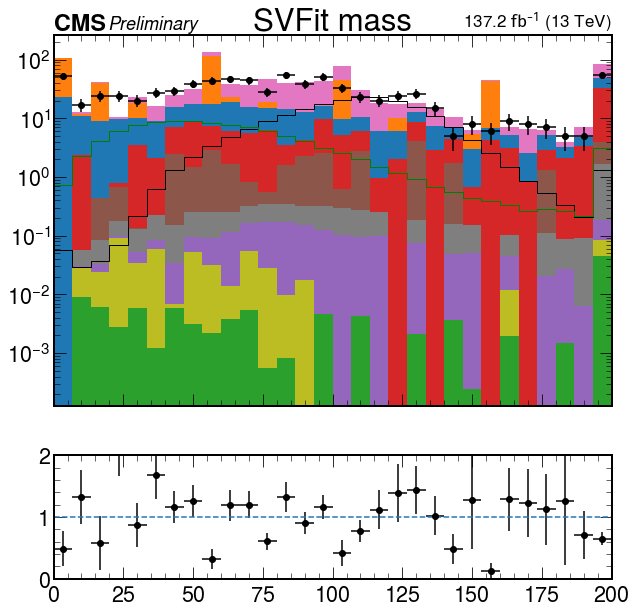

In [338]:
mgg_binning = "30,0,200" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    toFill = df.loc[(df["process_id"] == process_id) & (df["Category"] < 7), "m_tautau_SVFit"] # select by process, then select the quantity
    weight = df.loc[(df["process_id"] == process_id) & (df["Category"] < 7), "weight"]
    if process_id < 0:
        weight *= 1000
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process] if process in colors else None)        

# plots
# stack non-signals
temp = Hist1D()
temp._edges = mgg_hists["TTbar"]._edges
temp._counts = mgg_hists["TTbar"]._counts + mgg_hists["TTGamma"]._counts + mgg_hists["TTGG"]._counts
temp._errors = (mgg_hists["TTbar"]._errors ** 2 + mgg_hists["TTGamma"]._errors ** 2 + mgg_hists["TTGG"]._errors ** 2) ** 0.5
temp._metadata = mgg_hists["TTbar"]._metadata
mgg_hists["TTbar"] = temp

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
mgg_hists["Data"].plot(show_errors=True, color="k", ax=ax1)
mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]

mgg_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step", label="HH_ggTauTaux1000", ax=ax1)
mgg_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWWx1000", ax=ax1)
plt.sca(ax1)
plt.title("SVFit mass")
ax1.set_yscale("log")
leg1 = ax1.legend(fontsize=12)
leg1.remove()

total_counts = Hist1D()
for hist in hist_stack:
    total_counts._counts = total_counts._counts + hist._counts
    total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
    total_counts._edges = hist._edges
    total_counts._metadata = hist._metadata

ratio_hist = mgg_hists["Data"].copy()
ratio_hist /= total_counts

ratio_hist.plot(ax=ax2, show_errors=True, legend=None)
plt.sca(ax2)
plt.plot(linspace(0,200,50), np.ones(50), "--")
ax2.set_ylim([0,2])
plt.sca(ax1)
hep.cms.label(loc=0, data=True, lumi=137.2, fontsize=18)

plt.savefig("svfit_mass_slides.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


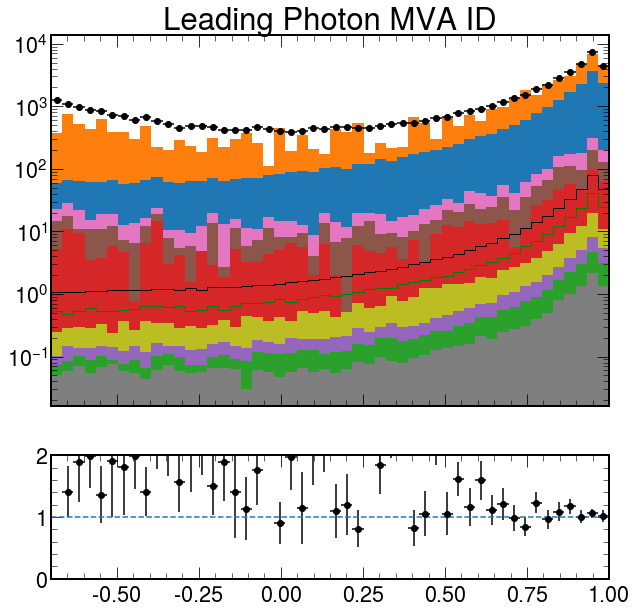

In [339]:
mgg_binning = "50,-0.7,1" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    toFill = df.loc[(df["process_id"] == process_id), "g1_idmva"] # select by process, then select the quantity
    weight = df.loc[(df["process_id"] == process_id), "weight"]
    if process_id < 0:
        weight *= 1000
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process] if process in colors else None)        

# plots
# stack non-signals
temp = Hist1D()
temp._edges = mgg_hists["TTbar"]._edges
temp._counts = mgg_hists["TTbar"]._counts + mgg_hists["TTGamma"]._counts + mgg_hists["TTGG"]._counts
temp._errors = (mgg_hists["TTbar"]._errors ** 2 + mgg_hists["TTGamma"]._errors ** 2 + mgg_hists["TTGG"]._errors ** 2) ** 0.5
temp._metadata = mgg_hists["TTbar"]._metadata
mgg_hists["TTbar"] = temp

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
mgg_hists["Data"].plot(show_errors=True, color="k", ax=ax1)
mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]

mgg_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step", label="HH_ggTauTaux1000", ax=ax1)
mgg_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWWx1000", ax=ax1)
plt.sca(ax1)
plt.title("Leading Photon MVA ID")
ax1.set_yscale("log")

leg1 = ax1.legend(fontsize=12)
leg1.remove()

total_counts = Hist1D()
for hist in hist_stack:
    total_counts._counts = total_counts._counts + hist._counts
    total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
    total_counts._edges = hist._edges
    total_counts._metadata = hist._metadata
ratio_hist = mgg_hists["Data"].copy()
ratio_hist /= total_counts

ratio_hist.plot(ax=ax2, show_errors=True, legend=None)
plt.sca(ax2)
plt.plot(linspace(-0.7,1,50), np.ones(50), "--")
ax2.set_ylim([0,2])

plt.savefig("g1_idmva_slides.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


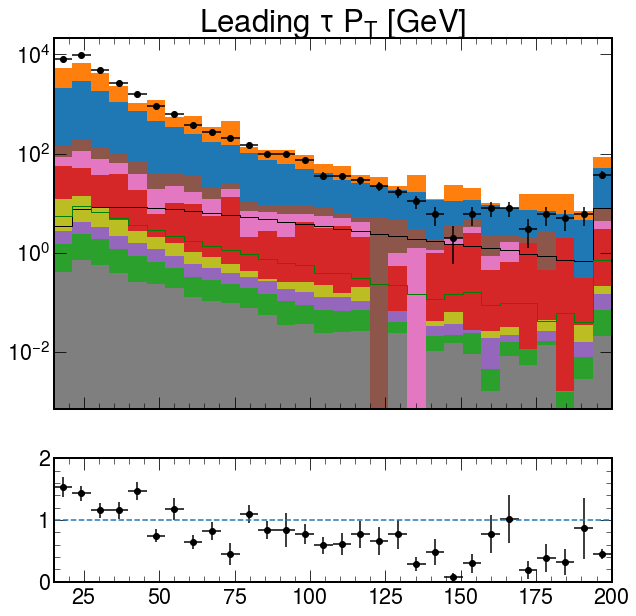

In [341]:
mgg_binning = "30,15,200" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    toFill = df.loc[(df["process_id"] == process_id) & (df["lep1_pdgID"] == 15), "lep1_pt"] # select by process, then select the quantity
    weight = df.loc[(df["process_id"] == process_id)& (df["lep1_pdgID"] == 15), "weight"]
    if process_id < 0:
        weight *= 1000
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process] if process in colors else None)        

# plots
# stack non-signals
temp = Hist1D()
temp._edges = mgg_hists["TTbar"]._edges
temp._counts = mgg_hists["TTbar"]._counts + mgg_hists["TTGamma"]._counts + mgg_hists["TTGG"]._counts
temp._errors = (mgg_hists["TTbar"]._errors ** 2 + mgg_hists["TTGamma"]._errors ** 2 + mgg_hists["TTGG"]._errors ** 2) ** 0.5
temp._metadata = mgg_hists["TTbar"]._metadata
mgg_hists["TTbar"] = temp

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
mgg_hists["Data"].plot(show_errors=True, color="k", ax=ax1)
mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]

mgg_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step", label="HH_ggTauTaux1000", ax=ax1)
mgg_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWWx1000", ax=ax1)
plt.sca(ax1)
plt.title("Leading $\\tau$ $P_T$ [GeV]")
ax1.set_yscale("log")

leg1 = ax1.legend(fontsize=10)
leg1.remove()

total_counts = Hist1D()
for hist in hist_stack:
    total_counts._counts = total_counts._counts + hist._counts
    total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
    total_counts._edges = hist._edges
    total_counts._metadata = hist._metadata

ratio_hist = mgg_hists["Data"].copy()
ratio_hist /= total_counts

#hep.yscale_legend(ax1)

ratio_hist.plot(ax=ax2, show_errors=True, legend=None)
plt.sca(ax2)
plt.plot(linspace(10,200,50), np.ones(50), "--")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.savefig("tau1_pt_slides.pdf")

In [ ]:
mva_t = uproot.open("../BDT/output/limit_progression/30_mar_isotracks_leptons_new_variables_with_WW_zipped.root")["t"]

In [48]:
mva_df = mva_t.arrays(["mva_score", "weight", "process_id", "train_label"], library="pd")

'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


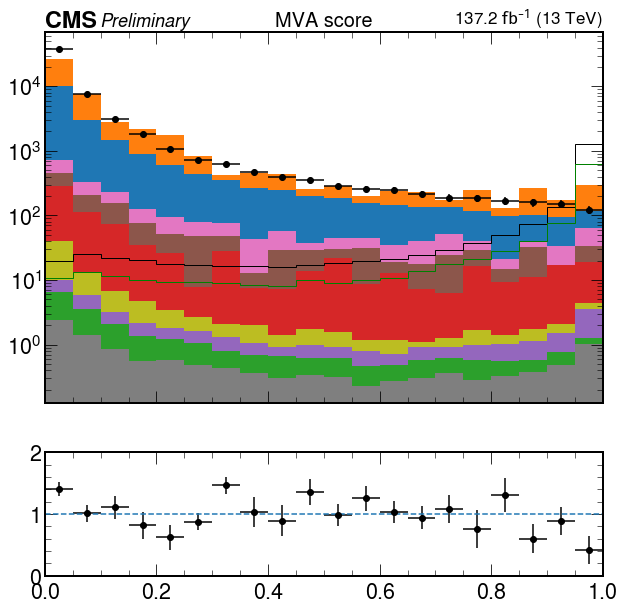

In [329]:
mgg_binning = "20,0,1" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    toFill = mva_df.loc[(mva_df["train_label"] == 2) & (mva_df["process_id"] == process_id), "mva_score"] # select by process, then select the quantity
    weight = mva_df.loc[(mva_df["train_label"] == 2) & (mva_df["process_id"] == process_id), "weight"]
    if process_id < 0:
        weight *= 5000
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process] if process in colors else None)        

# plots
# stack non-signals
temp = Hist1D()
temp._edges = mgg_hists["TTbar"]._edges
temp._counts = mgg_hists["TTbar"]._counts + mgg_hists["TTGamma"]._counts + mgg_hists["TTGG"]._counts
temp._errors = (mgg_hists["TTbar"]._errors ** 2 + mgg_hists["TTGamma"]._errors ** 2 + mgg_hists["TTGG"]._errors ** 2) ** 0.5
temp._metadata = mgg_hists["TTbar"]._metadata
mgg_hists["TTbar"] = temp

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
mgg_hists["Data"].plot(show_errors=True, color="k", ax=ax1)
mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]

mgg_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step", label="HH_ggTauTaux5000", ax=ax1)
mgg_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWWx5000", ax=ax1)

plt.sca(ax1)
leg1 = ax1.legend(fontsize=12)
leg1.remove()
plt.title("MVA score", fontsize=20)
ax1.set_yscale("log")
total_counts = hist_stack[0].copy()

total_counts = Hist1D()
for hist in hist_stack:
    total_counts._counts = total_counts._counts + hist._counts
    total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
    total_counts._edges = hist._edges
    total_counts._metadata = hist._metadata

ratio_hist = mgg_hists["Data"].copy()
ratio_hist /= total_counts

ratio_hist.plot(ax=ax2, show_errors=True, legend=None)
plt.sca(ax2)
plt.plot(linspace(0,1,50), np.ones(50), "--")
ax2.set_ylim([0,2])
plt.sca(ax1)
hep.cms.label(loc=0, data=True, lumi=137.2, fontsize=18)

plt.savefig("mva_score_slides.pdf")

1.2287449258463514


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


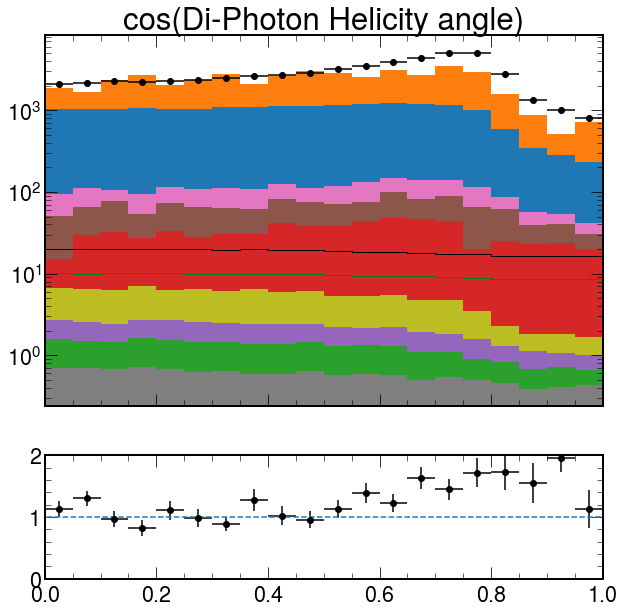

In [354]:
mgg_binning = "20,0,1" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    toFill = df.loc[(df["process_id"] == process_id), "gg_cosTheta_helicity_flashgg"] # select by process, then select the quantity
    weight = df.loc[(df["process_id"] == process_id), "weight"]
    if process_id < 0:
        weight *= 1000
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process] if process in colors else None)        

# plots
# stack non-signals
temp = Hist1D()
temp._edges = mgg_hists["TTbar"]._edges
temp._counts = mgg_hists["TTbar"]._counts + mgg_hists["TTGamma"]._counts + mgg_hists["TTGG"]._counts
temp._errors = (mgg_hists["TTbar"]._errors ** 2 + mgg_hists["TTGamma"]._errors ** 2 + mgg_hists["TTGG"]._errors ** 2) ** 0.5
temp._metadata = mgg_hists["TTbar"]._metadata
mgg_hists["TTbar"] = temp

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
mgg_hists["Data"].plot(show_errors=True, color="k", ax=ax1)
mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]

mgg_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step", label="HH_ggTauTaux1000", ax=ax1)
mgg_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWWx1000", ax=ax1)

plt.sca(ax1)
plt.title("cos(Di-Photon Helicity angle)")
ax1.set_yscale("log")

leg1 = ax1.legend(fontsize=12)
leg1.remove()

total_counts = Hist1D()
for hist in hist_stack:
    total_counts._counts = total_counts._counts + hist._counts
    total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
    total_counts._edges = hist._edges
    total_counts._metadata = hist._metadata

ratio_hist = mgg_hists["Data"].copy()
ratio_hist /= total_counts
print(mgg_hists["Data"].integral / total_counts.integral)
ratio_hist.plot(ax=ax2, show_errors=True, legend=None)
plt.sca(ax2)
plt.plot(linspace(-0.7,1,50), np.ones(50), "--")
ax2.set_ylim([0,2])
plt.sca(ax1)
#hep.cms.label(loc=0, data=True, lumi=137.2, fontsize=18)
plt.savefig("gg_hel.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


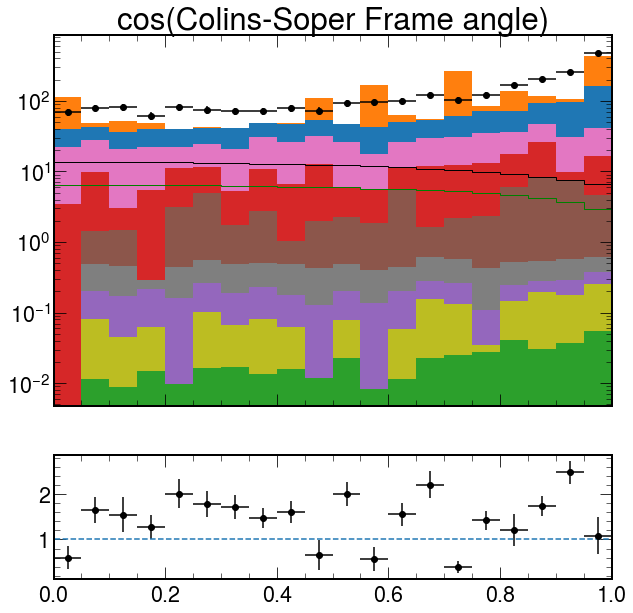

In [359]:
mgg_binning = "20,0,1" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    toFill = df.loc[(df["Category"] < 8) & (df["process_id"] == process_id), "gg_tt_CS"] # select by process, then select the quantity
    weight = df.loc[(df["Category"] < 8) & (df["process_id"] == process_id), "weight"]
    if process_id < 0:
        weight *= 1000
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process] if process in colors else None)        

# plots
# stack non-signals
temp = Hist1D()
temp._edges = mgg_hists["TTbar"]._edges
temp._counts = mgg_hists["TTbar"]._counts + mgg_hists["TTGamma"]._counts + mgg_hists["TTGG"]._counts
temp._errors = (mgg_hists["TTbar"]._errors ** 2 + mgg_hists["TTGamma"]._errors ** 2 + mgg_hists["TTGG"]._errors ** 2) ** 0.5
temp._metadata = mgg_hists["TTbar"]._metadata
mgg_hists["TTbar"] = temp

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
mgg_hists["Data"].plot(show_errors=True, color="k", ax=ax1)
mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]

mgg_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step", label="HH_ggTauTaux1000", ax=ax1)
mgg_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWWx1000", ax=ax1)
plt.sca(ax1)
plt.title("cos(Colins-Soper Frame angle)")
ax1.set_yscale("log")
leg1 = ax1.legend(fontsize=12)
leg1.remove()

total_counts = Hist1D()
for hist in hist_stack:
    total_counts._counts = total_counts._counts + hist._counts
    total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
    total_counts._edges = hist._edges
    total_counts._metadata = hist._metadata

ratio_hist = mgg_hists["Data"].copy()
ratio_hist /= total_counts

ratio_hist.plot(ax=ax2, show_errors=True, legend=None)
plt.sca(ax2)
plt.plot(linspace(-0.7,1,50), np.ones(50), "--")
#ax2.set_ylim([0,3])
plt.sca(ax1)
#hep.cms.label(loc=0, data=True, lumi=137.2, fontsize=18)
plt.savefig("gg_tt_CS_hel.pdf")

In [361]:
mgg_hists["Data"].integral, total_counts.integral

(2475.0, 2073.70505691765)

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


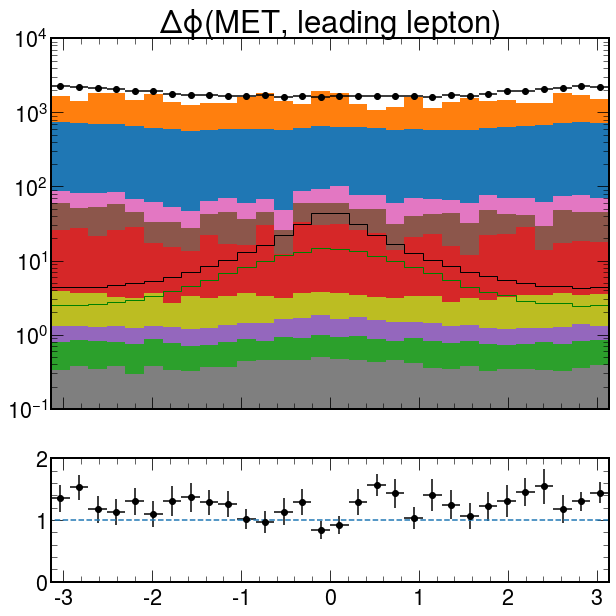

In [358]:
mgg_binning = "30,-3.14, 3.14" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    toFill = df.loc[(df["process_id"] == process_id), "dPhi_MET_tau1"] # select by process, then select the quantity
    weight = df.loc[(df["process_id"] == process_id), "weight"]
    if process_id < 0:
        weight *= 1000
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=None)        

# plots
# stack non-signals

temp = Hist1D()
temp._edges = mgg_hists["TTbar"]._edges
temp._counts = mgg_hists["TTbar"]._counts + mgg_hists["TTGamma"]._counts + mgg_hists["TTGG"]._counts
temp._errors = (mgg_hists["TTbar"]._errors ** 2 + mgg_hists["TTGamma"]._errors ** 2 + mgg_hists["TTGG"]._errors ** 2) ** 0.5
temp._metadata = mgg_hists["TTbar"]._metadata
mgg_hists["TTbar"] = temp

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
mgg_hists["Data"].plot(show_errors=True, color="k", ax=ax1)
mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]

mgg_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step", label="HH_ggTauTaux1000", ax=ax1)
mgg_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWWx1000", ax=ax1)
plt.sca(ax1)
plt.title("$\Delta\phi$(MET, leading lepton)")
ax1.set_yscale("log")
ax1.set_ylim([1e-1,1e4])
leg1 = ax1.legend()
leg1.remove()

total_counts = Hist1D()
for hist in hist_stack:
    total_counts._counts = total_counts._counts + hist._counts
    total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
    total_counts._edges = hist._edges
    total_counts._metadata = hist._metadata

ratio_hist = mgg_hists["Data"].copy()
ratio_hist /= total_counts
ratio_hist.plot(show_errors=True, color="k", ax=ax2, label=None)
plt.sca(ax2)
plt.plot(linspace(-2*pi, 2*pi,50), np.ones(50), "--")
ax2.set_ylim([0,2])
plt.sca(ax1)
#hep.cms.label(loc=0, data=True, lumi=137.2, fontsize=18)
#plt.legend(handles, labels, loc='upper center')
plt.savefig("dPhi_MET_tau1.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


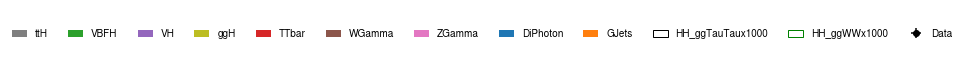

In [287]:
handles, labels = ax1.get_legend_handles_labels()

fig, ax = plt.subplots(figsize=(13.5,1))
plt.legend(handles, labels, loc="center", ncol=14, fontsize=10)
ax.axis("off")
plt.savefig("temp.pdf")